In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Importing necessary data sets
first_file=pd.read_csv('/Users/saiteja/Downloads/archive (7)/firstfile.csv')
second_file=pd.read_csv('/Users/saiteja/Downloads/archive (7)/Secondfile.csv')
special_sale=pd.read_csv('/Users/saiteja/Downloads/archive (7)/SpecialSale.csv')
sales = pd.read_csv('/Users/saiteja/Downloads/archive (7)/Sales.csv', delimiter='\t', low_memory=False)
media_investment=pd.read_csv('/Users/saiteja/Downloads/archive (7)/MediaInvestment.csv')
monthly_np_score=pd.read_csv('/Users/saiteja/Downloads/archive (7)/MonthlyNPSscore.csv')
product_list=pd.read_csv('/Users/saiteja/Downloads/archive (7)/ProductList.csv')

In [111]:
# Data cleaning of first file
first_file.drop('Unnamed: 0',axis=1,inplace=True)
first_file['Date']=pd.to_datetime(first_file['Date'])
first_file['month']=pd.DatetimeIndex(first_file['Date']).month
first_file['year']=pd.DatetimeIndex(first_file['Date']).year
first_file['day']=pd.DatetimeIndex(first_file['Date']).day

In [112]:
# setting second file
second_file.drop('Unnamed: 0',axis=1,inplace=True)

In [113]:
first_file

,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical,month,year,day
0,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7,2015,1
1,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker,7,2015,1
2,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad,7,2015,1
3,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl,7,2015,1
4,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl,7,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1578074,2016-06-30,No Promotion,665.0,1,1299.0,634.0,EntertainmentSmall,TVVideoSmall,VideoGlasses,6,2016,30
1578075,2016-06-30,No Promotion,2190.0,1,4000.0,1810.0,EntertainmentSmall,TVVideoSmall,VideoPlayer,6,2016,30
1578076,2016-06-30,No Promotion,2499.0,1,4999.0,2500.0,EntertainmentSmall,TVVideoSmall,SelectorBox,6,2016,30
1578077,2016-06-30,No Promotion,2644.0,1,3999.0,1355.0,EntertainmentSmall,TVVideoSmall,VideoPlayer,6,2016,30


In [114]:
second_file

,month,Revenue_Camera,Revenue_CameraAccessory,Revenue_EntertainmentSmall,Revenue_GameCDDVD,Revenue_GamingHardware,total_gmv,Units_Camera,Units_CameraAccessory,Units_EntertainmentSmall,...,Digital,Sponsorship,Content.Marketing,Online.marketing,Affiliates,SEM,Radio,Other,Date,NPS
0,Jan 2016,1.869358e+08,2.638743e+07,1.093020e+08,1.688487e+07,4.770016e+07,3.872102e+08,10442,22525,81510,...,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,2016-01-01,47.1
1,Feb 2016,1.549989e+08,2.536880e+07,1.011725e+08,1.510002e+07,3.561454e+07,3.322547e+08,8606,25406,81292,...,19000000.0,117000000.0,6000000.0,199000000.0,65000000.0,49000000.0,NaN,NaN,2016-02-01,50.3
2,Mar 2016,1.861417e+08,2.676195e+07,1.202884e+08,2.299259e+07,4.802562e+07,4.042102e+08,9969,25484,84429,...,21000000.0,416000000.0,4000000.0,184000000.0,62000000.0,52000000.0,9000000.0,159000000.0,2016-03-01,49.0
3,Apr 2016,1.470531e+08,2.534451e+07,9.808951e+07,2.081085e+07,4.848195e+07,3.397800e+08,8006,25926,70521,...,9000000.0,243000000.0,0.0,165000000.0,57000000.0,42000000.0,NaN,NaN,2016-04-01,51.8
4,May 2016,1.844336e+08,3.052432e+07,1.104899e+08,2.434611e+07,5.967982e+07,4.094737e+08,9419,28820,81713,...,8000000.0,317000000.0,8000000.0,237000000.0,68000000.0,69000000.0,11000000.0,50000000.0,2016-05-01,47.3
5,Jun 2016,1.284657e+08,2.243718e+07,9.806756e+07,1.709454e+07,3.985600e+07,3.059210e+08,6638,21807,67291,...,14000000.0,250000000.0,0.0,80000000.0,28000000.0,37000000.0,NaN,NaN,2016-06-01,50.5
6,Jul 2015,4.614023e+07,1.755561e+07,8.463275e+07,1.075666e+07,1.785191e+07,1.769372e+08,3519,12996,56804,...,25000000.0,74000000.0,0.0,13000000.0,5000000.0,50000000.0,NaN,NaN,2015-07-01,54.6
7,Aug 2015,6.155000e+04,4.227800e+04,2.586660e+05,1.805400e+04,3.864800e+04,4.191960e+05,4,38,175,...,13000000.0,11000000.0,0.0,1000000.0,1000000.0,25000000.0,NaN,NaN,2015-08-01,60.0
8,Sep 2015,1.370821e+08,4.620538e+07,1.783461e+08,2.477973e+07,4.007520e+07,4.264885e+08,9348,36051,127340,...,14000000.0,628000000.0,6000000.0,164000000.0,50000000.0,62000000.0,NaN,NaN,2015-09-01,46.9
9,Oct 2015,2.427325e+08,3.216185e+07,1.817664e+08,2.109576e+07,3.177574e+07,5.095323e+08,15726,27088,133872,...,126000000.0,847000000.0,34000000.0,244000000.0,70000000.0,319000000.0,NaN,NaN,2015-10-01,44.4


In [115]:
sales

,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,17-10-2015 15:11,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,19-10-2015 10:07,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,20-10-2015 15:45,2.420000e+15,2.420000e+15,1990,1,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,14-10-2015 12:05,4.420000e+15,4.420000e+15,1690,1,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,17-10-2015 21:25,4.420000e+15,4.420000e+15,1618,1,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,GAME8HATHWJHWYYE,27-04-2016 00:20,1.580000e+15,1.580000e+15,2499,1,6,CE,GameCDDVD,Game,PhysicalGame,3450,5
1048571,GAME8HATHWJHWYYE,27-04-2016 00:22,2.590000e+15,2.590000e+15,2490,1,4,CE,GameCDDVD,Game,PhysicalGame,3450,5
1048572,GAME8HATHWJHWYYE,27-04-2016 00:22,2.570000e+15,2.570000e+15,2799,1,3,CE,GameCDDVD,Game,PhysicalGame,3450,5
1048573,GAME8HATHWJHWYYE,27-04-2016 00:36,1.580000e+15,1.580000e+15,2775,1,5,CE,GameCDDVD,Game,PhysicalGame,3450,5


In [116]:
product_list

,Product,Frequency,Percent
0,\N,5828,0.4
1,AmplifierReceiver,4056,0.2
2,AudioMP3Player,112892,6.8
3,Binoculars,14599,0.9
4,BoomBox,2879,0.2
...,...,...,...
70,TVOutCableAccessory,7618,0.5
71,VideoGlasses,36723,2.2
72,VideoPlayer,20295,1.2
73,VoiceRecorder,3722,0.2


In [117]:
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN
5,2015,12,106.7,5.4,3.1,56.7,1.1,22.5,6.8,11.2,NaN,NaN
6,2016,1,74.2,4.4,0.5,4.2,0.9,22.9,7.4,4.2,2.7,27.1
7,2016,2,48.1,2.6,1.9,11.7,0.6,19.9,6.5,4.9,NaN,NaN
8,2016,3,100.0,9.3,2.1,41.6,0.4,18.4,6.2,5.2,0.9,15.9
9,2016,4,56.8,5.2,0.9,24.3,0.0,16.5,5.7,4.2,NaN,NaN


In [118]:
monthly_np_score

,Date,NPS
0,7/1/2015,54.6
1,8/1/2015,60.0
2,9/1/2015,46.9
3,10/1/2015,44.4
4,11/1/2015,47.0
5,12/1/2015,45.8
6,1/1/2016,47.1
7,2/1/2016,50.3
8,3/1/2016,49.0
9,4/1/2016,51.8


In [119]:
monthly_np_score['month']=pd.DatetimeIndex(monthly_np_score['Date']).month
monthly_np_score['year']=pd.DatetimeIndex(monthly_np_score['Date']).year

In [120]:
column_mapping = {"Month": "month", "Year": "year"}

# Use the `rename` method to rename the columns
media_investment.rename(columns=column_mapping, inplace=True)

In [121]:
second_file['month']=pd.DatetimeIndex(monthly_np_score['Date']).month
second_file['year']=pd.DatetimeIndex(monthly_np_score['Date']).year

In [ ]:
# Assuming you have your 'second_file' DataFrame loaded
# Load your DataFrame, for example:
# second_file = pd.read_csv('second_file.csv')

# Define the prefix
prefix = 'second_file_'

# Rename the columns with the prefix
second_file.columns = [prefix + column for column in second_file.columns]

# Now, all column names in 'second_file' have the 'second_file_' prefix


## MERGING MEDIA_INVESTMENT, MONTHLY NP SCORE AND SECONDFILE

In [123]:
import pandas as pd

# Assuming you have your 'first_file' and 'monthly_np_score' DataFrames ready
# Load your DataFrames, for example:
# first_file = pd.read_csv('first_file.csv')
# monthly_np_score = pd.read_csv('monthly_np_score.csv')

# Merge the two DataFrames on both 'year' and 'month' columns
merged_data = first_file.merge(monthly_np_score, on=['year', 'month'], how='left')

# Create a new column 'np_score' in 'first_file' and fill it with the 'NPS' from 'monthly_np_score'
first_file['np_score'] = merged_data['NPS']

# If there are missing values in 'np_score' (i.e., for months without a match), you can fill them with 0
first_file['np_score'].fillna(0, inplace=True)

# Now, 'first_file' contains a new column 'np_score' with values from 'monthly_np_score' based on matching 'year' and 'month'


In [124]:
import pandas as pd

# Assuming you have your 'first_file' and 'media_investment' DataFrames ready
# Load your DataFrames, for example:
# first_file = pd.read_csv('first_file.csv')
# media_investment = pd.read_csv('media_investment.csv')

# Columns to be added from media_investment
columns_to_add = ['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']

# Merge the two DataFrames on both 'year' and 'month' columns
merged_data = first_file.merge(media_investment, on=['year', 'month'], how='left')

# Add the columns from media_investment to first_file where there's a match
for column in columns_to_add:
    first_file[column] = merged_data[column]

# If there are missing values in the added columns, you can fill them with 0
for column in columns_to_add:
    first_file[column].fillna(0, inplace=True)

# Now, 'first_file' contains additional columns from 'media_investment' based on matching 'year' and 'month'


In [131]:
# Assuming you have your 'first_file' and 'second_file' DataFrames ready
# Load your DataFrames, for example:
# first_file = pd.read_csv('first_file.csv')
# second_file = pd.read_csv('second_file.csv')

# Columns to be added from 'second_file' (with the 'second_file_' prefix)
columns_to_add = [
    'second_file_Revenue_Camera', 'second_file_Revenue_CameraAccessory', 'second_file_Revenue_EntertainmentSmall',
    'second_file_Revenue_GameCDDVD', 'second_file_Revenue_GamingHardware', 'second_file_total_gmv',
    'second_file_Units_Camera', 'second_file_Units_CameraAccessory', 'second_file_Units_EntertainmentSmall',
    'second_file_Units_GameCDDVD', 'second_file_Units_GamingHardware', 'second_file_total_Units',
    'second_file_Mrp_Camera', 'second_file_Mrp_CameraAccessory', 'second_file_Mrp_EntertainmentSmall',
    'second_file_Mrp_GameCDDVD', 'second_file_Mrp_GamingHardware', 'second_file_total_Mrp',
    'second_file_Discount_Camera', 'second_file_Discount_CameraAccessory', 'second_file_Discount_EntertainmentSmall',
    'second_file_Discount_GameCDDVD', 'second_file_Discount_GamingHardware', 'second_file_total_Discount',
    'second_file_Year', 'second_file_Total.Investment', 'second_file_TV', 'second_file_Digital',
    'second_file_Sponsorship', 'second_file_Content.Marketing', 'second_file_Online.marketing',
    'second_file_Affiliates', 'second_file_SEM', 'second_file_Radio', 'second_file_Other', 'second_file_NPS'
]

# Merge the two DataFrames on both 'year' and 'month' columns
merged_data = first_file.merge(second_file, left_on=['year', 'month'], right_on=['second_file_year', 'second_file_month'],how='left')

# If there are missing values in the added columns, you can fill them with 0
for column in columns_to_add:
    first_file[column] = merged_data[column]

# Now, 'first_file' contains additional columns from 'second_file' with the 'second_file_' prefix based on matching 'year' and 'month'


In [133]:
first_file

,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical,month,...,second_file_TV,second_file_Digital,second_file_Sponsorship,second_file_Content.Marketing,second_file_Online.marketing,second_file_Affiliates,second_file_SEM,second_file_Radio,second_file_Other,second_file_NPS
0,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7,...,44000000.0,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,47.1
1,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker,7,...,44000000.0,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,47.1
2,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad,7,...,44000000.0,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,47.1
3,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl,7,...,44000000.0,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,47.1
4,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl,7,...,44000000.0,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,47.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578074,2016-06-30,No Promotion,665.0,1,1299.0,634.0,EntertainmentSmall,TVVideoSmall,VideoGlasses,6,...,54000000.0,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,NaN,NaN,45.8
1578075,2016-06-30,No Promotion,2190.0,1,4000.0,1810.0,EntertainmentSmall,TVVideoSmall,VideoPlayer,6,...,54000000.0,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,NaN,NaN,45.8
1578076,2016-06-30,No Promotion,2499.0,1,4999.0,2500.0,EntertainmentSmall,TVVideoSmall,SelectorBox,6,...,54000000.0,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,NaN,NaN,45.8
1578077,2016-06-30,No Promotion,2644.0,1,3999.0,1355.0,EntertainmentSmall,TVVideoSmall,VideoPlayer,6,...,54000000.0,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,NaN,NaN,45.8


In [141]:
first_file.columns

Index(['Date', 'Sales_name', 'gmv_new', 'units', 'product_mrp', 'discount',
       'product_category', 'product_subcategory', 'product_vertical', 'month',
       'year', 'day', 'np_score', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'second_file_Revenue_Camera',
       'second_file_Revenue_CameraAccessory',
       'second_file_Revenue_EntertainmentSmall',
       'second_file_Revenue_GameCDDVD', 'second_file_Revenue_GamingHardware',
       'second_file_total_gmv', 'second_file_Units_Camera',
       'second_file_Units_CameraAccessory',
       'second_file_Units_EntertainmentSmall', 'second_file_Units_GameCDDVD',
       'second_file_Units_GamingHardware', 'second_file_total_Units',
       'second_file_Mrp_Camera', 'second_file_Mrp_CameraAccessory',
       'second_file_Mrp_EntertainmentSmall', 'second_file_Mrp_GameCDDVD',
       'second_file_Mrp_GamingHardware', 'second_file_total_Mrp',
 

In [172]:
df=first_file

In [188]:
a=['Date','second_file_Revenue_Camera',
       'second_file_Revenue_CameraAccessory',
       'second_file_Revenue_EntertainmentSmall',
       'second_file_Revenue_GameCDDVD', 'second_file_Revenue_GamingHardware',
       'second_file_total_gmv','second_file_Units_Camera',
       'second_file_Units_CameraAccessory',
       'second_file_Units_EntertainmentSmall', 'second_file_Units_GameCDDVD',
       'second_file_Units_GamingHardware', 'second_file_total_Units',
       'second_file_Mrp_Camera', 'second_file_Mrp_CameraAccessory',
       'second_file_Mrp_EntertainmentSmall', 'second_file_Mrp_GameCDDVD',
       'second_file_Mrp_GamingHardware', 'second_file_total_Mrp',
       'second_file_Discount_Camera', 'second_file_Discount_CameraAccessory',
       'second_file_Discount_EntertainmentSmall',
       'second_file_Discount_GameCDDVD', 'second_file_Discount_GamingHardware',
       'second_file_total_Discount', 'second_file_Year',
       'second_file_Total.Investment', 'second_file_TV', 'second_file_Digital',
       'second_file_Sponsorship', 'second_file_Content.Marketing',
       'second_file_Online.marketing', 'second_file_Affiliates',
       'second_file_SEM', 'second_file_Radio', 'second_file_Other',
        'second_file_NPS']

In [190]:
df.drop(a,axis=1,inplace=True)


## VISUALIZATION

/var/folders/c5/l7k8rcqn2j38mgjj243bkh540000gn/T/ipykernel_13962/3207871338.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x, y=y, palette="viridis", s=100)  # Adjust palette and point size


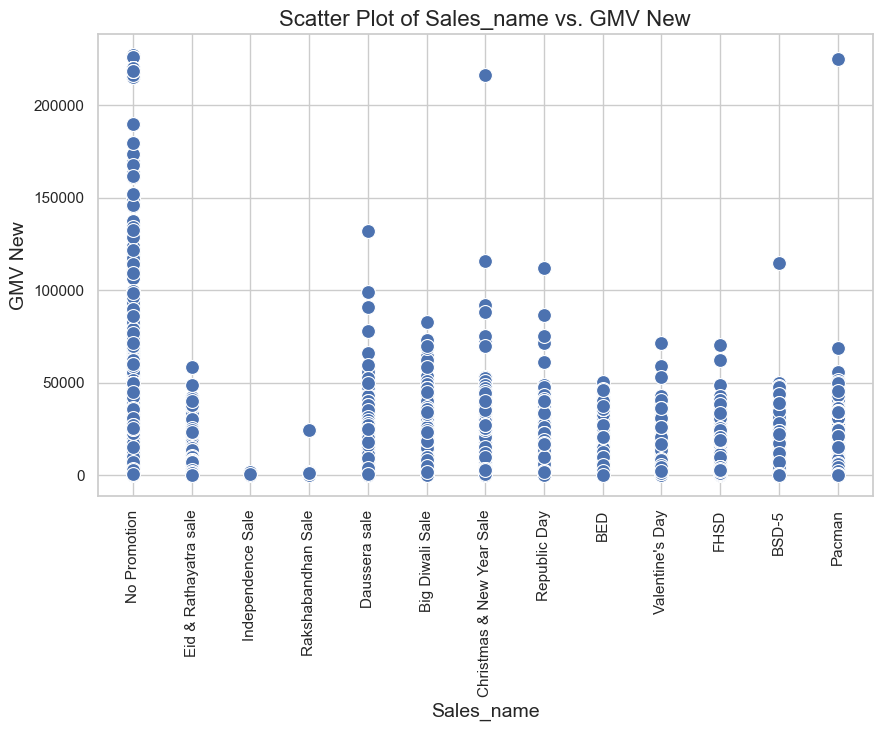

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with 'Sales_name' and 'gmv_new' columns
x = df['Sales_name']
y = df['gmv_new']

# Set the seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.scatterplot(x=x, y=y, palette="viridis", s=100)  # Adjust palette and point size

# Add labels and a title
plt.xlabel('Sales_name', fontsize=14)
plt.ylabel('GMV New', fontsize=14)
plt.title('Scatter Plot of Sales_name vs. GMV New', fontsize=16)

# Customize the axis labels and tick labels if needed
# For example, to rotate x-axis labels:
# plt.xticks(rotation=45)
plt.xticks(rotation=90)
# Show the plot
plt.show()


/var/folders/c5/l7k8rcqn2j38mgjj243bkh540000gn/T/ipykernel_13962/981638537.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, palette="viridis")


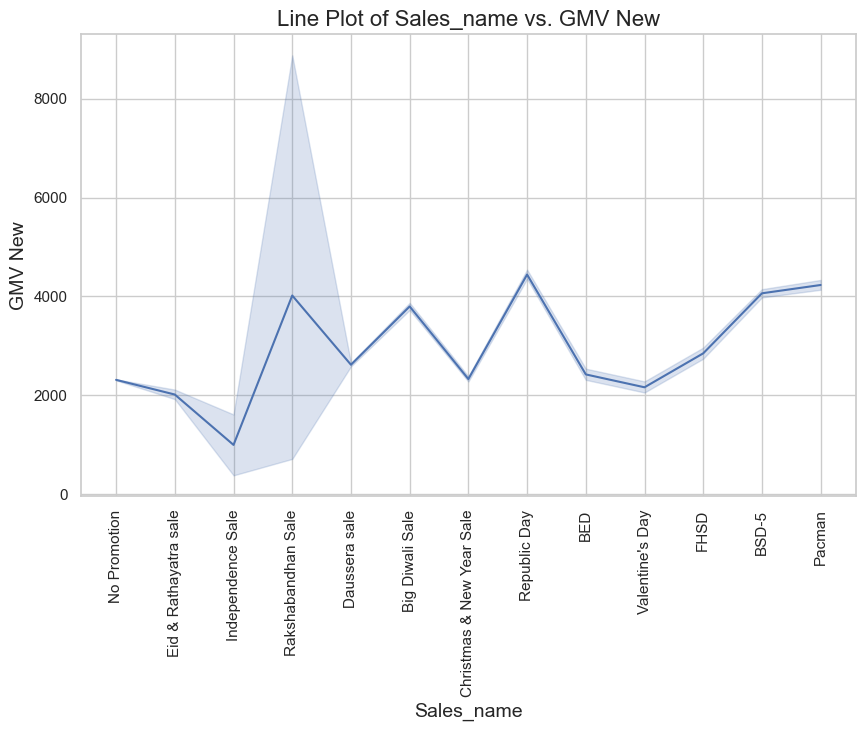

In [201]:
x = df['Sales_name']
y = df['gmv_new']

# Set the seaborn style
sns.set(style="whitegrid")

# Create a line plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.lineplot(x=x, y=y, palette="viridis")

# Add labels and a title
plt.xlabel('Sales_name', fontsize=14)
plt.ylabel('GMV New', fontsize=14)
plt.title('Line Plot of Sales_name vs. GMV New', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()







/var/folders/c5/l7k8rcqn2j38mgjj243bkh540000gn/T/ipykernel_13962/293113672.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, palette="viridis")


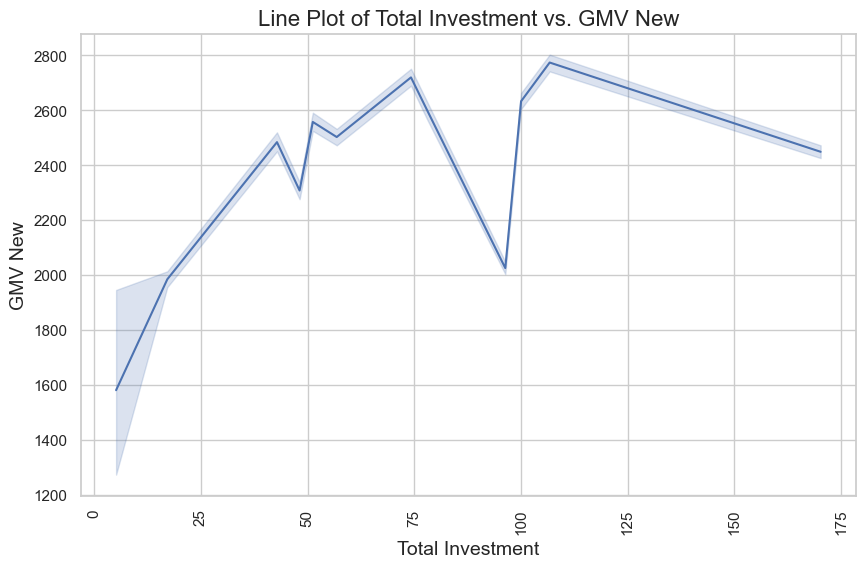

In [203]:
x = df['Total Investment']
y = df['gmv_new']

# Set the seaborn style
sns.set(style="whitegrid")

# Create a line plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.lineplot(x=x, y=y, palette="viridis")

# Add labels and a title
plt.xlabel('Total Investment', fontsize=14)
plt.ylabel('GMV New', fontsize=14)
plt.title('Line Plot of Total Investment vs. GMV New', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()



/var/folders/c5/l7k8rcqn2j38mgjj243bkh540000gn/T/ipykernel_13962/1367705977.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, palette="viridis")


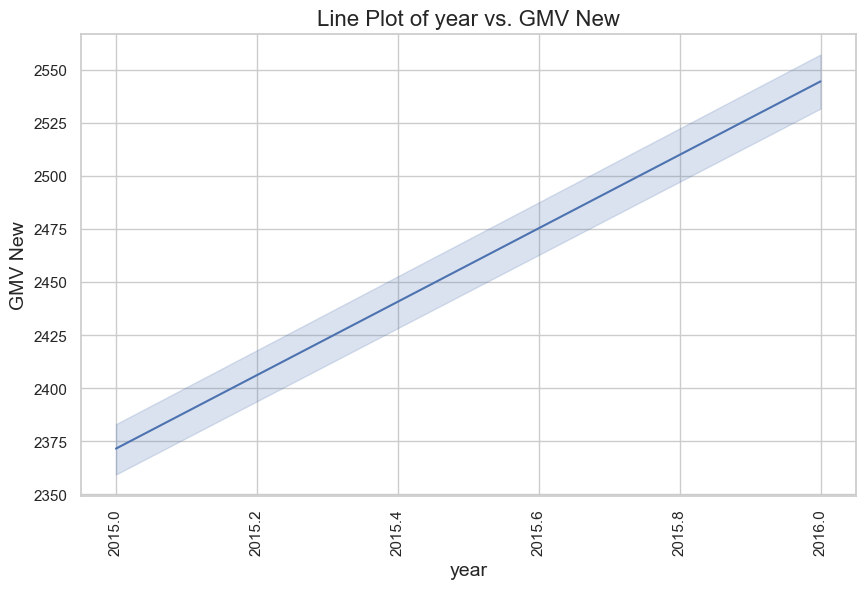

In [227]:
x = df['year']
y = df['gmv_new']

# Set the seaborn style
sns.set(style="whitegrid")

# Create a line plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.lineplot(x=x, y=y, palette="viridis")

# Add labels and a title
plt.xlabel('year', fontsize=14)
plt.ylabel('GMV New', fontsize=14)
plt.title('Line Plot of year vs. GMV New', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()



/var/folders/c5/l7k8rcqn2j38mgjj243bkh540000gn/T/ipykernel_13962/1744828252.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x, y=y, palette="viridis")


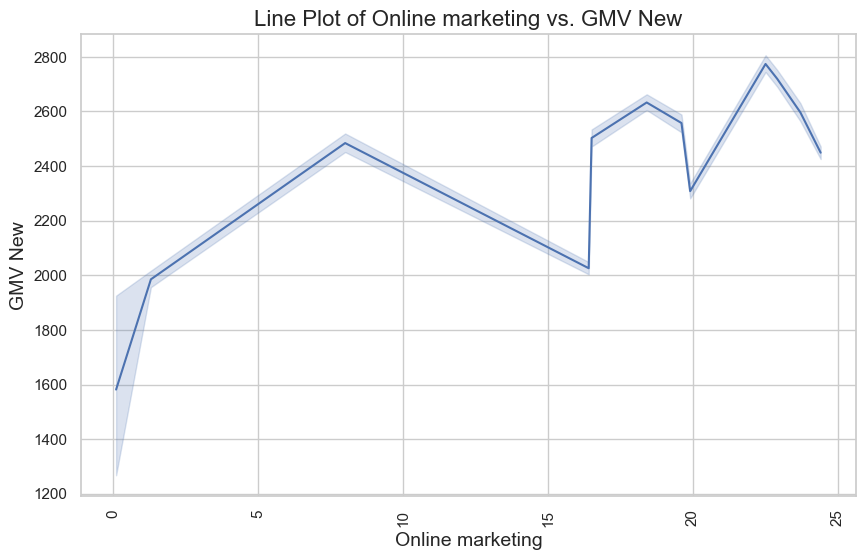

In [226]:
x = df['Online marketing']
y = df['gmv_new']

# Set the seaborn style
sns.set(style="whitegrid")

# Create a line plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.lineplot(x=x, y=y, palette="viridis")

# Add labels and a title
plt.xlabel('Online marketing', fontsize=14)
plt.ylabel('GMV New', fontsize=14)
plt.title('Line Plot of Online marketing vs. GMV New', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()



In [217]:
df.dtypes

Sales_name              object
gmv_new                float64
units                    int64
product_mrp            float64
discount               float64
product_category        object
product_subcategory     object
product_vertical        object
month                    int32
year                     int32
day                      int32
np_score               float64
Total Investment       float64
TV                     float64
Digital                float64
Sponsorship            float64
Content Marketing      float64
Online marketing       float64
 Affiliates            float64
SEM                    float64
Radio                  float64
Other                  float64
dtype: object

In [231]:
df['gmv_new'].mean()

2461.6785584244562

# Data Transformtion

In [234]:
unique_sales_names = df['Sales_name'].unique()

# Create a mapping dictionary from unique values to numbers
mapping = {value: i + 1 for i, value in enumerate(unique_sales_names)}

# Replace the values in the 'Sales_name' column with numbers
df['Sales_name'] = df['Sales_name'].map(mapping)

In [239]:
unique_sales_names = df['product_subcategory'].unique()

# Create a mapping dictionary from unique values to numbers
mapping = {value: i + 1 for i, value in enumerate(unique_sales_names)}

# Replace the values in the 'Sales_name' column with numbers
df['product_subcategory'] = df['product_subcategory'].map(mapping)

In [241]:
a=['product_category','product_vertical',]
df.drop(a,axis=1,inplace=True)

In [262]:
a=-1 #initializing for indexing purpose

for i in range(len(df.columns)):# iterates till every column of the data frame
    a+=1
    
    b=df.columns[a] # returns the column name of the data frame
    
    c=df[b] # returns all the data of the specific data column
    
    maxx=c.max()
    minn=c.min() # collecting max and min values of particular column
    
    e=[]
    
    for j in c: #  applying min max algorithm 
        
        d=(j-minn)/(maxx-minn) # formulae [X=(X−Xmin)/(Xmax−Xmin)].
        
        e.append(round(d,2)) # appending to empty list
    
    
    df[b]=e #finally replacing the actual values  with the min max scaling results

In [263]:
df

,Sales_name,gmv_new,units,product_mrp,discount,product_subcategory,month,year,day,np_score,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,0.0,0.01,0.0,0.01,0.00,0.00,0.55,0.0,0.00,0.65,0.07,0.02,0.17,0.08,0.0,0.05,0.05,0.09,0.0,0.0
1,0.0,0.00,0.0,0.00,0.00,0.08,0.55,0.0,0.00,0.65,0.07,0.02,0.17,0.08,0.0,0.05,0.05,0.09,0.0,0.0
2,0.0,0.01,0.0,0.02,0.01,0.15,0.55,0.0,0.00,0.65,0.07,0.02,0.17,0.08,0.0,0.05,0.05,0.09,0.0,0.0
3,0.0,0.00,0.0,0.00,0.00,0.23,0.55,0.0,0.00,0.65,0.07,0.02,0.17,0.08,0.0,0.05,0.05,0.09,0.0,0.0
4,0.0,0.00,0.0,0.00,0.00,0.23,0.55,0.0,0.00,0.65,0.07,0.02,0.17,0.08,0.0,0.05,0.05,0.09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578074,0.0,0.00,0.0,0.00,0.00,0.23,0.45,1.0,0.97,0.39,0.23,0.18,0.07,0.29,0.0,0.33,0.37,0.04,0.0,0.0
1578075,0.0,0.01,0.0,0.01,0.00,0.23,0.45,1.0,0.97,0.39,0.23,0.18,0.07,0.29,0.0,0.33,0.37,0.04,0.0,0.0
1578076,0.0,0.01,0.0,0.01,0.01,0.23,0.45,1.0,0.97,0.39,0.23,0.18,0.07,0.29,0.0,0.33,0.37,0.04,0.0,0.0
1578077,0.0,0.01,0.0,0.01,0.00,0.23,0.45,1.0,0.97,0.39,0.23,0.18,0.07,0.29,0.0,0.33,0.37,0.04,0.0,0.0


# APPLYING ML MODEL

In [291]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'gmv_new' is your target variable (y) and all other columns are your features (X)
y = df['gmv_new']
X = df.drop('gmv_new', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2) score: {r2:.2f}")


R-squared (R2) score: 0.95
